
Descrição do Problema

    Trabalho Final - O dataset IRIS
    Amostras por classe: 50
    Dimensionalidade: 4
    Tipo das features: Números reais positivos

O conjunto de dados IRIS talvez seja o mais clássico dos conjuntos de testes de algoritmos de classificação. Ele divide amostras de plantas em três espécies diferentes e tem, como features, a altura e largura de duas partes da planta: a sépala e as pétalas. Neste trabalho você deve classificar esse conjunto de dados com pelo menos dois algoritmos. Você deverá analisá-los segundo as métricas de qualidade que julgar relevantes, e utilizar técnicas de busca de hiperparâmetros e validação cruzada para tornar seus resultados mais robustos.

Fonte: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

Observação: gerar gráficos que expliquem e ilustrem o seu problema não é parte obrigatória da resolução do trabalho, mas é um treino bastante recomendado. Além disso, será necessário consultar a documentação do scikit-learn para fazer esse trabalho. Busque por “algoritmos de classificação” e pelos códigos mostrados durante as aulas interativas. Saber consultar documentações é uma habilidade importante de quem trabalha com Aprendizado de Máquina, e é isso que pretendemos desenvolver aqui!


In [1]:
import seaborn


In [1]:
# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Importando o dataset iris
from sklearn import datasets

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [2]:
# Modelos de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Outras bibliotecas do sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Trabalho Prático 03 - camila" --iversions

seaborn    0.11.0
numpy      1.19.1
plotly     4.10.0
matplotlib 3.3.1
pandas     1.1.1
Trabalho Prático 03 - camila


In [4]:
iris = datasets.load_iris()

data = pd.DataFrame({
    'sepal_length':iris.data[:,0],
    'sepal_width' :iris.data[:,1],
    'species'     :iris.target
})

# Visualizando o shape do dataset (150 linhas x 3 colunas)
print(data.shape)

# Verificando os tipos de dados
data.info()

# Visualizando as primeiras linhas do dataset
data.head()

(150, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   species       150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


,sepal_length,sepal_width,species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [5]:
#analisando feature species
# Verificar as classes de especies no dataset
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
#Criação e Validação dos Modelos de Machine Learning¶
#Preparando os dados para treinamento do baseline¶

# Vamos armazenar 'target' no rótulo (y) e as duas primeiras colunas do dataset em X
X = iris.data[:, :2]
y = iris.target

# Split do dataset em treino e teste: 70% treino and 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
# Criando a instancia do modelo RF
model_rf = RandomForestClassifier(n_estimators=100)

# Realizando o fit do modelo com os dados de treino
model_rf.fit(X_train, y_train)

# Realizando as previsões com os dados de teste
y_pred = model_rf.predict(X_test)

# Verificando o desempenho do modelo usando a metrica Accuracy
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Acurácia: 0.6666666666666666


In [8]:
# Realizando um simples teste como novos dados
novo_dado = model_rf.predict([[5.8, 3.5]])[0]

# Verificando qual a espécie desse novo dado
iris.target_names[novo_dado]



'setosa'

In [9]:
#Realizando o treinamento usando Random Forest Classifier com GridSearchCV


params = {'n_estimators': (5, 300)}

grid_rf = GridSearchCV(RandomForestClassifier(), params, cv=10, n_jobs=-1, scoring='accuracy')
grid_rf.fit(X, y)
grid_rf.best_score_
grid_rf.best_params_

# Realizando as previsões com os dados de teste
y_pred_ot = grid_rf.predict(X_test)

# Verificando o desempenho do modelo usando a metrica Accuracy
print("Acurácia:",metrics.accuracy_score(y_test, y_pred_ot))



GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': (5, 300)}, scoring='accuracy')

0.7533333333333333

{'n_estimators': 5}

Acurácia: 0.8888888888888888


[[15  0  0]
 [ 0 12  4]
 [ 0  1 13]]


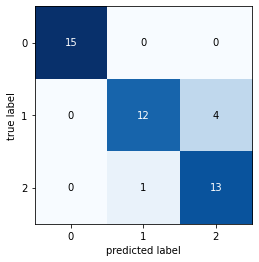

In [12]:
#Verificando o desempenho do modelo¶
# Contrução da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred_ot)
print(matriz_confusao)

#Realiza o plot da matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show() 


In [13]:

#Realizando o treinamento usando KNeighborsClassifier


# Criando a instancia do modelo KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

# Realizando o fit do modelo com os dados de treino
model_knn.fit(X_train, y_train)

# Realizando as previsões com os dados de teste
y_pred = model_knn.predict(X_test)

# Verificando o desempenho do modelo usando a metrica Accuracy
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))



KNeighborsClassifier()

Acurácia: 0.7333333333333333


In [16]:
#Realizando o treinamento usando KNeighborsClassifier com GridSearchCV


params = {'n_neighbors': range(1,30), 
          'weights'    : ["uniform", "distance"]}

grid_knn = GridSearchCV(KNeighborsClassifier(), params, cv=10, scoring='accuracy')
grid_knn.fit(X, y)

print (grid_knn.best_score_)
print (grid_knn.best_params_)
print (grid_knn.best_estimator_)

# Realizando as previsões com os dados de teste
y_pred_knn_ot = grid_knn.predict(X_test)

# Verificando o desempenho do modelo usando a metrica Accuracy
print("Acurácia:",metrics.accuracy_score(y_test, y_pred_knn_ot))



GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

0.8000000000000002
{'n_neighbors': 23, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=23)
Acurácia: 0.8222222222222222


[[15  0  0]
 [ 0 12  4]
 [ 0  1 13]]


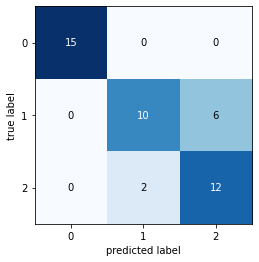

In [17]:
# Contrução da matriz de confusão
matriz_confusao_knn = confusion_matrix(y_test, y_pred_knn_ot)
print(matriz_confusao)

# Realiza o plot da matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_knn)
plt.show()